# SSIFL

In [1]:
%matplotlib inline
%cd "~/lab/NB10422645"
import matplotlib
import torch
print("CUDA is: ",torch.cuda.is_available())
from src.surrogate.meta_models import SupportVectorRegression as svr
from src.surrogate.meta_models import FeedForwardNNRegression as ffn
from src.surrogate.test import TestFunctionSet2DInputSpace as F2D
from src.surrogate.test import TestFunctionSetNDInputSpace as FND

from sklearn.preprocessing import MinMaxScaler
from src.surrogate.algorithms import SSIFL

scaler = MinMaxScaler()
F2D = F2D()
FND = FND(4)

/home/ggarrett/lab/NB10422645
CUDA is:  True


/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Visualisation

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.



Epoch [  1  /5000 ]  |  Train Loss:  0.511356  |  Validation Loss:  0.164283  |  lr:  0.00100
Epoch [ 201 /5000 ]  |  Train Loss:  0.011028  |  Validation Loss:  0.015845  |  lr:  0.00100
Epoch [ 401 /5000 ]  |  Train Loss:  0.006607  |  Validation Loss:  0.016780  |  lr:  0.00100
Epoch [ 601 /5000 ]  |  Train Loss:  0.004121  |  Validation Loss:  0.019834  |  lr:  0.00100
Epoch [ 801 /5000 ]  |  Train Loss:  0.002692  |  Validation Loss:  0.018364  |  lr:  0.00100
Epoch [1001 /5000 ]  |  Train Loss:  0.002380  |  Validation Loss:  0.019402  |  lr:  0.00100
Epoch [1201 /5000 ]  |  Train Loss:  0.001955  |  Validation Loss:  0.017137  |  lr:  0.00100
Epoch [1401 /5000 ]  |  Train Loss:  0.001737  |  Validation Loss:  0.016824  |  lr:  0.00100
Epoch [1601 /5000 ]  |  Train Loss:  0.001981  |  Validation Loss:  0.016113  |  lr:  0.00100
Epoch [1801 /5000 ]  |  Train Loss:  0.002241  |  Validation Loss:  0.017551  |  lr:  0.00100
Epoch [2001 /5000 ]  |  Train Loss:  0.001482  |  Validation

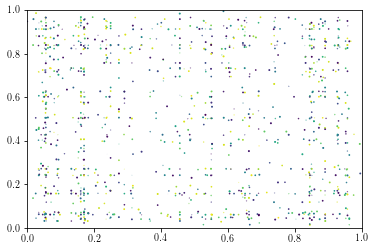

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

/home/ggarrett/anaconda3/envs/py37/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

In [ ]:

# from src.utils.matlab import idx_target_sim_func

test = SSIFL(func=FND[0],
             x_dim=4,
             meta_model=ffn(),
             delta=0.05,
             epsilon=0.05,
             verbose=True,
             scaler=scaler)

test.iterate_to_confidence(cumulative=True, 
                           verbose=200,
                           importance="error",
                           hopt=True)

x_test = test.sample(10000,
                     "halton", seed=1, tdmq=False,
                     verbose=False)

# Evaluate the experiments.
f_test = test.func(*x_test.T)

print(test.pacc_evaluate(test.scaler.transform(f_test.reshape(-1,1)).flatten(),
                         test.meta_model.predict(x_test),
                         test.epsilon,
                         test.delta))



In [20]:
import numpy as np
from src.surrogate.sampling import uniform_grid
from src.surrogate.sampling.util import plotly3Dsurf, plotly3Dtrisurf
    
def compare(n, model, scaler):
    
    bounds = np.array([[0]*n,[1]*n])
    X = uniform_grid(bounds, 200, flatten=False)
    
    X_ = uniform_grid(bounds, 200, flatten=True)

    def vec_eval(x):
        return model.predict(x)
    F=vec_eval(X_)
    if scaler:
        plotly3Dsurf(X[0], X[1], scaler.inverse_transform(F.reshape(-1,1)).reshape(200,200))
    
    else:
        plotly3Dsurf(X[0], X[1], F.reshape(200,200))

        
compare(2, test.meta_model, test.scaler)
# print(test.meta_model.hyper_params)
# print(test.meta_model.)

In [10]:
x_test = test.sample(10000,
                     "halton", seed=1, tdmq=False,
                     verbose=False)

f_test = test.func(*x_test.T)

print(test.pacc_evaluate(test.scaler.transform(f_test.reshape(-1,1)).flatten(),
                         test.meta_model.predict(x_test),
                         test.epsilon,
                         test.delta))

EvaluationLog(n_samples=10000, n_passing=8464, statistic=0.8464, terminate=False)


## Bicycle Simulink

In [5]:
print(test.meta_model.all_params)


def compare2(n, model, scaler):
    
    bounds = np.array([[0]*2,[1]*2])
    X = uniform_grid(bounds, 100, flatten=False)
    X_ = uniform_grid(bounds, 100, flatten=True)

    def vec_eval(x):
#         print(x)
        x = np.hstack((np.ones((len(x[:,0]),1)) * 0.1, x))
        return model.predict(x)
    
    F=vec_eval(X_)
    
    if scaler:
        plotly3Dsurf(X[0], X[1], scaler.inverse_transform(F.reshape(-1,1)).reshape(100,100))
    
    else:
        plotly3Dsurf(X[0], X[1], F.reshape(100,100))


{'activation': 'leaky_relu', 'dropout_rate': 0.001, 'learning_rate': 5e-05, 'n_hidden_layers': 3, 'n_hidden_neurons': 500, 'batch_size': None, 'batch_size_fraction': 0.2, 'num_epochs': 5000, 'early_stopping': <src.surrogate.meta_models.deeplearning.util.LutzPrecheltEarlyStopping object at 0x7ff4390e2f10>, 'x_dim': 2, 'f_dim': 1}


In [6]:
# test.meta_model.hyper_params
test.meta_model.fit(test._training_data[0],test._training_data[1])

AttributeError: 'NoneType' object has no attribute 'reshape'

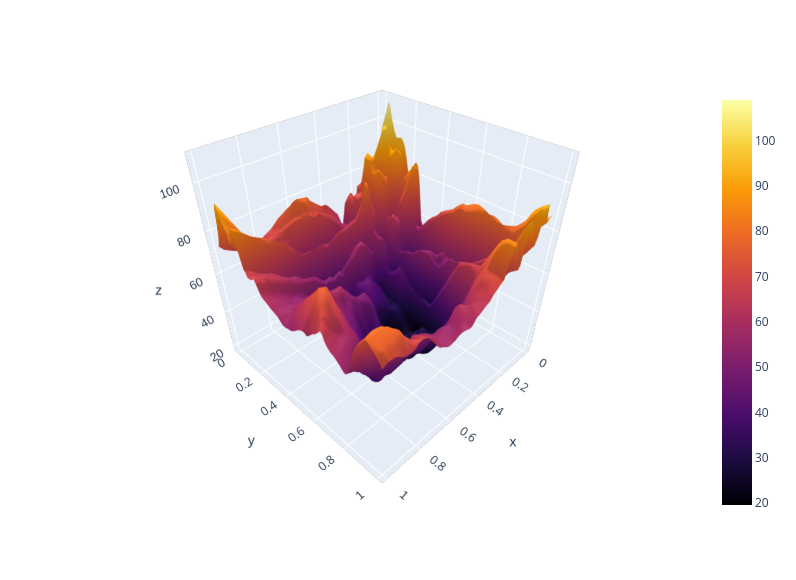

SimpleRectangularNN(
  (fc_in): Sequential(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Dropout(p=0.001, inplace=False)
    (3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_center): Sequential(
    (0): Linear(in_features=500, out_features=500, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Dropout(p=0.001, inplace=False)
    (3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_out): RegressionOutput(
    (block): Sequential(
      (0): Linear(in_features=500, out_features=1, bias=True)
    )
  )
)


In [19]:
compare2(3, test.meta_model, test.scaler)

test.meta_model.save("test.sv")
print(test.meta_model._model)